### Proof-of-concept: Crude lightcurve extraction from PSF wing of TOI-1231, Sector 37

In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt, matplotlib.patches as patches
import numpy as np

In [2]:
# Downloaded 16x16 pixel cutout from Sector 37, centered on nominal position of TOI1231 
# https://mast.stsci.edu/tesscut/
h = fits.open(r"C:\Users\rntr\Downloads\tess-s0037-3-2_156.747889_-52.469429_16x16_astrocut.fits")
data = h[1].data
d = np.array([data[i][4] for i in range(len(data))])
t = np.array([data[i][0] for i in range(len(data))])

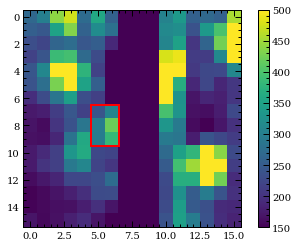

In [3]:
# Plot average image
plt.imshow(np.mean(d, axis=0), vmin=150, vmax=500)
plt.colorbar()
# Draw rectangle 
rect = patches.Rectangle((4.5,6.5), 2, 3, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect);

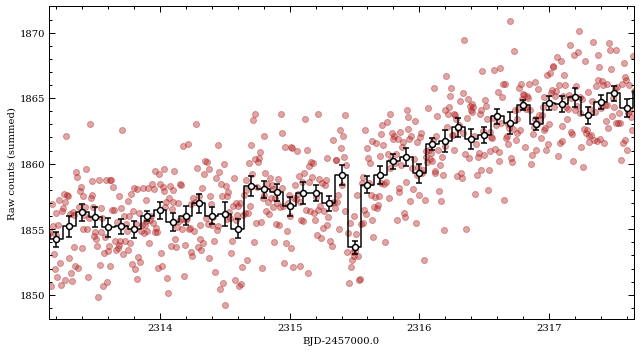

In [4]:
# Zoom to 2315.5 and sum pixels from rectangle
tt = t[850:1500]
y = np.sum(np.sum(d[850:1500,7:10,5:7], axis=2), axis=1)

# Bin in 0.1d steps
tbin = np.arange(2313, 2318, 0.1, dtype=float)
ybin = tbin*np.nan
ybinerr = tbin*np.nan
for i in range(len(tbin)):
    tb = tbin[i]
    mask = np.abs(tt-tb) <= 0.05
    if np.sum(mask) > 0:
        ybin[i] = np.mean(y[mask])
        ybinerr[i] = np.std(y[mask]/np.sqrt(np.sum(mask)))

# Plot lightcurve
plt.figure(figsize=(9,5))
plt.scatter(tt, y, alpha=0.4, marker='o', color='firebrick')
plt.errorbar(tbin, ybin, yerr=ybinerr, drawstyle='steps-mid', color='k', zorder=9, linewidth=1.5, capsize=3, capthick=1.5)
plt.scatter(tbin, ybin, fc='w', color='k', marker='o', zorder=10, linewidth=1.5)
plt.xlim((min(tt), max(tt)))
plt.xlabel('BJD-2457000.0')
plt.ylabel('Raw counts (summed)')
plt.tight_layout()